**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
%load_ext pycodestyle_magic

In [3]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):
    def __init__(self, n_neighbors, algorithm='brute'):
        self.neighbors = n_neighbors
        self.algo = algorithm

    def fit(self, X, y):
        self.X_tr = np.array(X).astype(float)
        self.y_tr = np.array(y).astype(int)
        if self.algo == 'kd_tree':
            self.tree = KDTree(self.X_tr)
        self.uniq_cl = np.unique(y)
        self.X_tr_sqr = (self.X_tr ** 2).sum(axis=1)

    def predict(self, X):
        return self.predict_proba(X).argmax(axis=1)


    def predict_proba(self, X):
        X = X.astype(float)
        if self.algo == 'brute':
            distances = (X ** 2).sum(axis=1).reshape(-1, 1) - 2 * X.dot(self.X_tr.T) + self.X_tr_sqr
            k_class = self.y_tr[np.argsort(distances)][:, :self.neighbors]
        elif self.algo == 'kd_tree':
            distances, k_class = self.tree.query(X, k=self.neighbors)
        k_class_proba = np.zeros([X.shape[0], self.uniq_cl.shape[0]])
        for i in range(X.shape[0]):
            for j in k_class[i]:
                k_class_proba[i][int(self.y_tr[j])] += 1
        return k_class_proba / self.neighbors

    def score(self, X, y):
        return (self.predict(X) == y).sum() / X.shape[0]

**IRIS**

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [7]:
%time clf.fit(X_train, y_train)

Wall time: 46.9 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [8]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [9]:
%time clf.predict(X_test)

Wall time: 31.2 ms


array([1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1])

In [10]:
%time my_clf.predict(X_test)

Wall time: 234 ms


array([1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0, 1], dtype=int32)

In [11]:
%time clf.predict_proba(X_test)

Wall time: 0 ns


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [12]:
%time my_clf.predict_proba(X_test)

Wall time: 15.6 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [13]:
clf.score(X_test, y_test)

0.9333333333333333

In [14]:
my_clf.score(X_test, y_test)

0.3333333333333333

Задание 3

Number of neigbors for best score is 20



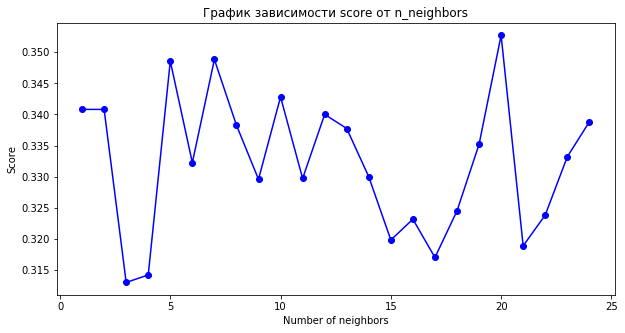

In [18]:
#%%pycodestyle

n_neighbors = range(1, 25)
test = range(1, 500)
my_scores = []

for i in n_neighbors:
    result = []
    for j in test:
        X_train, X_test, y_train, y_test = (train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target))
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        result.append(my_clf.score(X_test, y_test))
    my_scores.append(np.mean(result))

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
plt.plot(n_neighbors, my_scores, 'ro-', color='blue')
ax.set_xlabel("Number of neighbors")
ax.set_ylabel("Score")
ax.set_title("График зависимости score от n_neighbors")

my_n = np.argmax(my_scores) + 1
print("Number of neigbors for best score is {}".format(my_n))
print()

**MNIST**

In [19]:
mnist = fetch_mldata('MNIST original')

OSError: could not read bytes

In [20]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

NameError: name 'mnist' is not defined

In [21]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [22]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [23]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [24]:
%time clf.predict(X_test)

Wall time: 0 ns


array([1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 1])

In [25]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 1], dtype=int32)

In [26]:
%time clf.predict_proba(X_test)

Wall time: 0 ns


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [27]:
%time my_clf.predict_proba(X_test)

Wall time: 0 ns


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [28]:
clf.score(X_test, y_test)

1.0

In [29]:
my_clf.score(X_test, y_test)

1.0

Задание 4

In [30]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

NameError: name 'mnist' is not defined

In [32]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [33]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [34]:
%time clf.predict(X_test)

Wall time: 15.6 ms


array([1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 1])

In [35]:
%time my_clf.predict(X_test)

Wall time: 15.6 ms


array([1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 1], dtype=int32)

In [36]:
%time clf.predict_proba(X_test)

Wall time: 0 ns


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [37]:
%time my_clf.predict_proba(X_test)

Wall time: 0 ns


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [38]:
clf.score(X_test, y_test)

1.0

In [39]:
my_clf.score(X_test, y_test)

1.0

Задание 5

In [37]:
# seaborn - визуализация данных (использует matplotlib)
# matplotlib - библиотека, ориентированная на вывод научной информации в графическом виде 
# train_test_split - функция, которая случайным образом делит данные на тестовые и тренировочные
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - для последовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс, который нормализует входные данные ()
# ClassifierMixin - базовый класс для классификаторов
# NeighborsBase - базовый класс для метода ближайших соседей
# KNeighborsMixin - особый вид множественного наследования
# SupervisedIntegerMixin - базовый класс, позволяет обучить классификатор при помощи метода fit